In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Dataset
df = pd.read_csv(r'C:\Users\sanjy\Downloads\Employee_Attrition_Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Encoding Categorical Values
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'EducationField']
encoder = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(encoder.fit_transform)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   int32 
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# Define Features and Target
y = df['Attrition']
X = df.drop(['EmployeeCount', 'Attrition', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [8]:
ros = RandomOverSampler(random_state=42)
X_, y = ros.fit_resample(X, y)
X = pd.DataFrame(X_, columns=X.columns)

In [9]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
print("After Oversampling:")
print(y.value_counts())

After Oversampling:
Attrition
1    1233
0    1233
Name: count, dtype: int64


In [11]:
# Standardization
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)
X_standardized = standard_scaler.fit_transform(X)

In [12]:
# Normalization
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)
X_normalized = min_max_scaler.fit_transform(X)

In [13]:
# Grid Search CV for Hyperparameter Tuning
def tune_hyperparameters(model, X, y):
    param_grid = {
        'n_neighbors': np.arange(5, 20, 2),
        'leaf_size': np.arange(1, 50, 5),
        'weights': ['uniform', 'distance']
    }
    grid_search = GridSearchCV(model, param_grid=param_grid)
    grid_search.fit(X, y)
    print("Best Params:", grid_search.best_params_)
    return grid_search.best_params_

In [14]:
print("### Grid Search without Scaled Data ###")
best_params_raw = tune_hyperparameters(KNeighborsClassifier(), X_train, y_train)

### Grid Search without Scaled Data ###
Best Params: {'leaf_size': 1, 'n_neighbors': 7, 'weights': 'distance'}


In [15]:
print("### Grid Search with Standardized Data ###")
best_params_std = tune_hyperparameters(KNeighborsClassifier(), X_train_standardized, y_train)

### Grid Search with Standardized Data ###
Best Params: {'leaf_size': 1, 'n_neighbors': 19, 'weights': 'distance'}


In [16]:
print("### Grid Search with Normalized Data ###")
best_params_norm = tune_hyperparameters(KNeighborsClassifier(), X_train_normalized, y_train)

### Grid Search with Normalized Data ###
Best Params: {'leaf_size': 1, 'n_neighbors': 15, 'weights': 'distance'}


In [17]:
# Training, Evaluation & ROC Plot
def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()


### Without Scaling ###

Accuracy:  0.827027027027027
Precision:  0.7567567567567568
Recall:  0.9949238578680203
F1 Score:  0.8596491228070176
Confusion Matrix:
 [[220 126]
 [  2 392]]


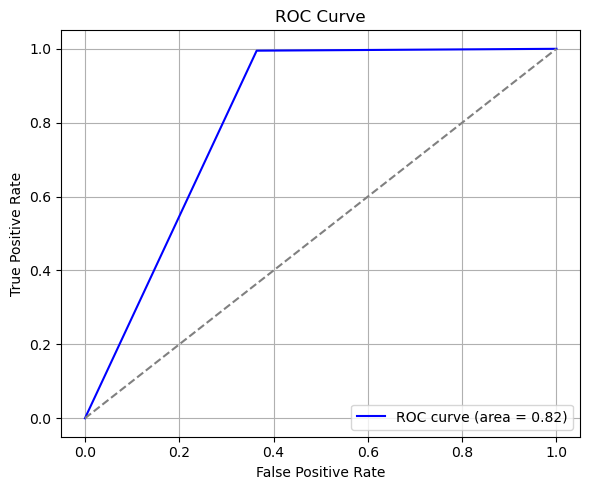

In [18]:
print("\n### Without Scaling ###\n")
train_predict_evaluate(KNeighborsClassifier(**best_params_raw), X_train, y_train, X_test, y_test)


### With Standardization ###

Accuracy:  0.8972972972972973
Precision:  0.8456521739130435
Recall:  0.9873096446700508
F1 Score:  0.9110070257611241
Confusion Matrix:
 [[275  71]
 [  5 389]]


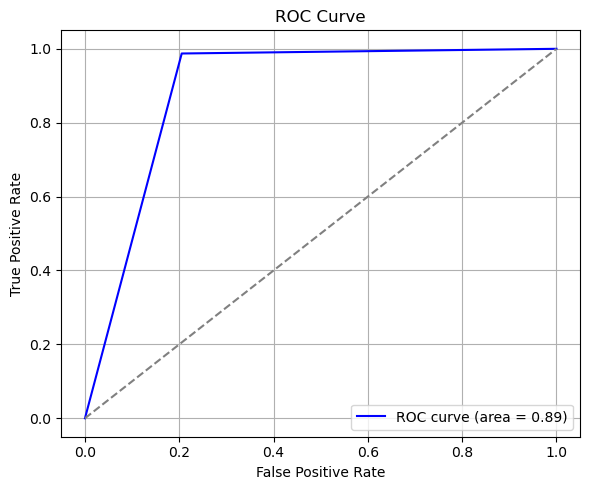

In [19]:
print("\n### With Standardization ###\n")
train_predict_evaluate(KNeighborsClassifier(**best_params_std), X_train_standardized, y_train, X_test_standardized, y_test)


### With Normalization ###

Accuracy:  0.8810810810810811
Precision:  0.8241525423728814
Recall:  0.9873096446700508
F1 Score:  0.8983833718244804
Confusion Matrix:
 [[263  83]
 [  5 389]]


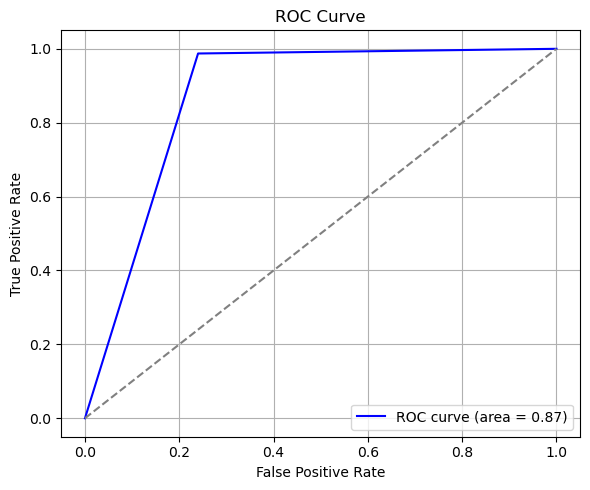

In [20]:
print("\n### With Normalization ###\n")
train_predict_evaluate(KNeighborsClassifier(**best_params_norm), X_train_normalized, y_train, X_test_normalized, y_test)

In [21]:
# K-Fold Cross Validation
def cross_validation(model, X, y):
    scores = cross_validate(model, X, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))
    metrics = {
        "Accuracy": np.mean(scores['test_accuracy']),
        "Precision": np.mean(scores['test_precision']),
        "Recall": np.mean(scores['test_recall']),
        "F1 Score": np.mean(scores['test_f1'])
    }

    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    return list(metrics.values())

metrics = []

In [22]:
print("\n### Without Scaling ###\n")
metrics.append(cross_validation(KNeighborsClassifier(**best_params_raw), X, y))


### Without Scaling ###

Accuracy: 0.8244
Precision: 0.7410
Recall: 0.9984
F1 Score: 0.8506


In [23]:
print("\n### With Standardization ###\n")
metrics.append(cross_validation(KNeighborsClassifier(**best_params_std), X_standardized, y))


### With Standardization ###

Accuracy: 0.8844
Precision: 0.8130
Recall: 0.9992
F1 Score: 0.8964


In [24]:
print("\n### With Normalization ###\n")
metrics.append(cross_validation(KNeighborsClassifier(**best_params_norm), X_normalized, y))


### With Normalization ###

Accuracy: 0.8808
Precision: 0.8086
Recall: 0.9984
F1 Score: 0.8934


In [25]:
# Compare Performances
mdf = pd.DataFrame(metrics, columns=["Accuracy", "Precision", "Recall", "F1 Score"],
                   index=["Without Scaling", "With Standardization", "With Normalization"])

mdf

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.824414,0.741030,0.998381,0.850573
With Standardization,0.884422,0.812960,0.999190,0.896413
With Normalization,0.880777,0.808643,0.998381,0.893437


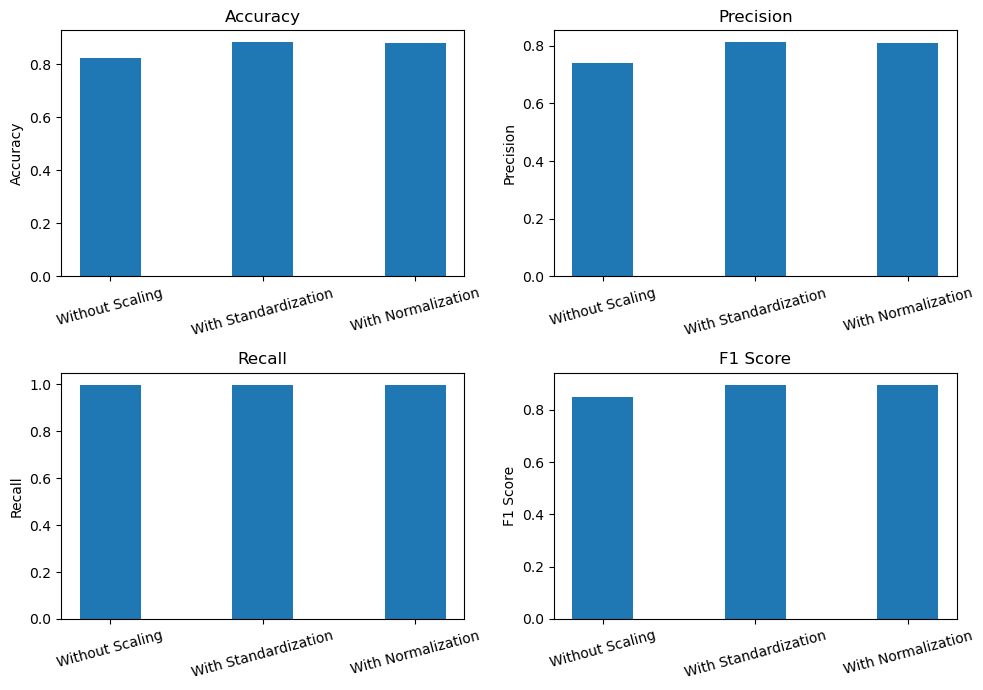

In [26]:
# Plot each metric
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

bar_width = 0.4

for ax, col in zip(axs.ravel(), mdf.columns):
    ax.bar(mdf.index, mdf[col], width=bar_width)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xticks(range(len(mdf.index)))
    ax.set_xticklabels(mdf.index, rotation=15)
    ax.grid(False)

plt.tight_layout()
plt.show()